In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


pd.options.mode.chained_assignment = None

from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import pdpbox
from pdpbox import pdp, info_plots 

In [45]:
###Import dataset transformed by CatBoost Encoder
Area=pd.read_csv('Area.csv')

In [46]:
###Split dataset on input and output data
y1=Area['Area']
X1=Area.drop('Area',axis=1)

In [47]:
### Train model
X_train, X_valid, y_train, y_valid=train_test_split(X1,y1, test_size=0.1, random_state=50, stratify=X1['Modulator'])
model_area=CatBoostRegressor(iterations=200, depth=9, l2_leaf_reg=0.5)
model_area.fit(X_train,y_train, logging_level='Silent')

In [48]:
###Choose modylator
BzOH=1335.2527227722776
AcOH=1320.229446605375
HCOOH=1448.2931368136813
TFA=1402.6343131188119

In [49]:
###Select synthesis using modylator chosen from dataset
K=X1[X1['Modulator']==1320.229446605375]
F=K.copy()

In [50]:
###Show data chosen before transformation
F.head()

,"[Zr], M","[BDC], M",Modulator,"[Mod],M",[H$_2$O]:[Zr] ratio,"Aging, h","T, $^o$C",Number of DMF washes,Total washes,Last solvent in pores,"Activation T, $^o$C","Activation time, h","Time of synthesis, h",Zr source
21,0.016674,0.016665,1320.229447,29.974770,0.0,0.0,120.0,1,2,1211.734313,300.0,1.0,24.0,False
22,0.013656,0.070091,1320.229447,87.827119,0.0,0.0,90.0,3,6,1263.229802,0.0,0.0,18.0,True
23,0.011728,0.060194,1320.229447,298.441667,0.0,0.0,90.0,3,6,1263.229802,0.0,0.0,18.0,True
24,0.009049,0.046446,1320.229447,740.577027,0.0,0.0,90.0,3,6,1263.229802,0.0,0.0,18.0,True
26,0.031025,0.037900,1320.229447,41.781833,0.0,0.0,120.0,4,8,1370.034354,120.0,12.0,24.0,True


In [51]:
### Transformation 
for i in F.columns[2:-1]:
    result=F[i].mean()
    F[i]=result

In [52]:
###Show data chosen after transformation
F.head()

,"[Zr], M","[BDC], M",Modulator,"[Mod],M",[H$_2$O]:[Zr] ratio,"Aging, h","T, $^o$C",Number of DMF washes,Total washes,Last solvent in pores,"Activation T, $^o$C","Activation time, h","Time of synthesis, h",Zr source
21,0.016674,0.016665,1320.229447,69.612483,6.244112,6.545455,118.054545,2.436364,4.418182,1328.286382,160.909091,13.472727,38.836364,False
22,0.013656,0.070091,1320.229447,69.612483,6.244112,6.545455,118.054545,2.436364,4.418182,1328.286382,160.909091,13.472727,38.836364,True
23,0.011728,0.060194,1320.229447,69.612483,6.244112,6.545455,118.054545,2.436364,4.418182,1328.286382,160.909091,13.472727,38.836364,True
24,0.009049,0.046446,1320.229447,69.612483,6.244112,6.545455,118.054545,2.436364,4.418182,1328.286382,160.909091,13.472727,38.836364,True
26,0.031025,0.037900,1320.229447,69.612483,6.244112,6.545455,118.054545,2.436364,4.418182,1328.286382,160.909091,13.472727,38.836364,True


(<Figure size 540x684 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f678f7ce7b8>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f678ee5eba8>})

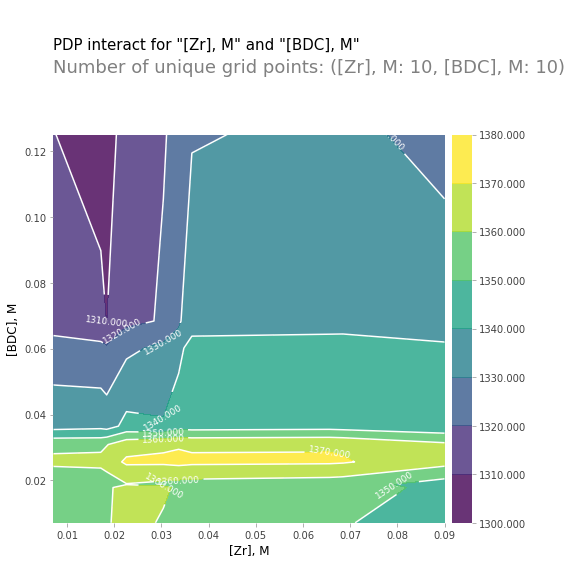

In [53]:
### Plot 2D PDP curve
pdp_X_Y=pdpbox.pdp.pdp_interact(model=model_area, dataset=F, model_features=F.columns, \
                                features=['[Zr], M','[BDC], M'])
pdpbox.pdp.pdp_interact_plot(pdp_X_Y,['[Zr], M','[BDC], M'],plot_params={'subtitle_fontsize': 18,\
                                                                          'contour_color':  'white',\
                                                                         })

In [54]:
###Save 2D PDP curve
pdp_X_Y.pdp.to_csv('Area_AcOH_Zr_BDC.csv')

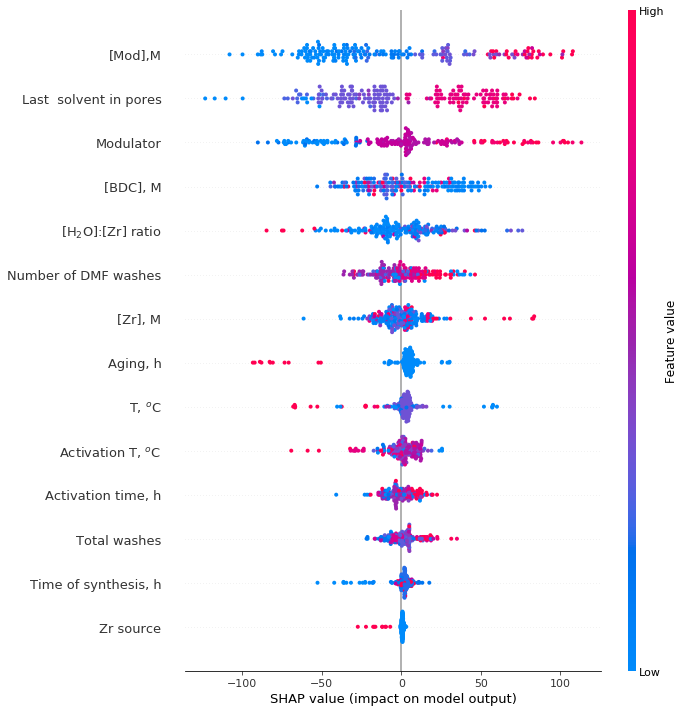

In [55]:
import shap

shap_test = shap.TreeExplainer(model_area).shap_values(X1)
shap.summary_plot(shap_test,X1, plot_size=(10,10))